7.
==
En este ejercicio se propone verificar la predicción de ley de Zipf. 
Para ello, descargue desde Project Gutenberg el texto del Quijote de Cervantes 
    y escriba un programa que extraiga los términos y calcule sus frecuencias. 
Calcule la curva de ajuste utilizando la función Polyfit del módulo NymPy. 
Con los datos crudos y los estimados grafique en la notebook ambas distribuciones 
    (haga 2 gráficos, uno en escala lineal y otro en log-log). 
¿Cómo se comporta la predicción? 
¿Qué conclusiones puede obtener? 
    Verifique que el ajuste obtenido se comporta mejor para un rango de valores que excluye los primeros y
    los últimos dato



In [1]:
from os.path import isdir
from os import listdir
from modulos import tokenizer 
from modulos import dictionary
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import r2_score

Extraigo los terminos del quijote
================================
Para eso defino la funcion get_terms()


In [2]:
def get_terms(file,file_empty_words= False):
    word_dic = {}
    lines = open(file,'r',errors = 'ignore').readlines()
    tokens = tokenizer.tokenizar(lines)
    if file_empty_words:
        stop_words = open(file_empty_words,'r').read()
        tokens = dictionary.sacar_palabras_vacias(tokens,stop_words)
        
    for token in tokens:
        if(token in word_dic):      
            word_dic[token] += 1
        else:
            word_dic[token] = 1
    return word_dic
     


Funcion Para ordenar el diccionario

In [3]:
def sort_dic(dic):
    
    return ((i,dic[i],idx+1) for idx,i in enumerate(sorted (dic,key=dic.get, reverse=True))  )
       

In [4]:
def graficar (lista):
    x=[]
    y=[]
    x_log=[]
    y_log=[]
    #((x.append(value), y.apend(index)) for term,value,index in list)
    x_r=[]
    y_r=[]
    
    #variables para recortar el grafico en los extremos
    lista=list(lista)
    
    extrems=5
    list_aux=(list(lista))
    
    long= len(list_aux)
    minimo = long*extrems//100
    maximo = long -minimo
    lista2 = lista[int(minimo):int(maximo)]
        
    print(minimo,maximo)
    
    for term,value,index in lista:
        x.append(index)
        y.append(value)
    
    for term,value,index in lista2:
        x_r.append(index)
        y_r.append(value)
        
    ajuste = np.polyfit(np.log(x),np.log(y),1)
    recta =np.poly1d(ajuste)
    ypred = recta(np.log(x))
    
    ajuste_l =np.polyfit(x,y,1)
    recta_l = np.poly1d(ajuste_l)
    ypred_l = recta_l(x)

    r_cuad = r2_score(np.log(y),ypred)
    
    ypred2=recta(np.log(x_r))
   
    r_cuad_r = r2_score(np.log(y_r),ypred2)


    print(r_cuad," - ",r_cuad_r)
    
    plt.plot(x,y)
    plt.title("Lineal") 
    plt.xlabel("Ranking") 
    plt.ylabel("Frecuencia") 
    plt.show()
    plt.plot(np.log(x),np.log(y),np.log(x),ypred)
    plt.title("Logaritmico") 
    plt.xlabel("Ranking") 
    plt.ylabel("Frecuencia")
    plt.show()
    
    
    plt.plot(np.log(x_r),np.log(y_r),np.log(x_r),ypred2)
    plt.title("Recortada") 
    plt.xlabel("Ranking") 
    plt.ylabel("Frecuencia") 
    plt.show()
    
    
    f = [100,1000,10000]
    print (ajuste[0])
    print(ajuste[1])
    
    
    
   

1016 19310
0.9677173965281001  -  0.9582648627579138


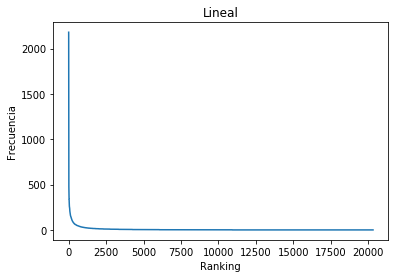

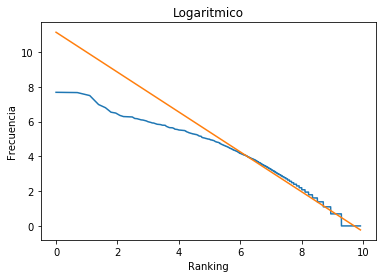

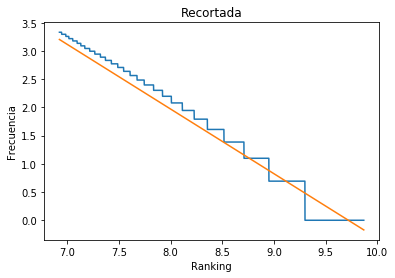

-1.146549661565909
11.143378303877677


In [5]:
graficar(sort_dic(get_terms('gutemberg/pg2000.txt','extras/vacias.txt')))

En el grafico exponencial se ve que en los primeros y ultimos terminos la recta naranja(recta predicta), no ajusta correctamente algo que el el grafico logaritmico se ve mas pronunciadamente. Se puede concluir que la mayor cantidad de terminos en los extremos inclina la recta de prediccion, y no logra un ajuste correcto. para esto se elminan los extremos


Luego cuando se recortan el 5% de los terminos en cada extremo, podemos notar mas claramente que los terminos del medio, la recta ajusta mucho mejor

# Ejercicio 8 TP2 
Usando los datos del ejercicios anterior y de acuerdo a la ley de Zipf, calcule la proporción del total de términos para aquellos que tienen frecuencia f = {100, 1000, 10000}. Verifique respecto de los valores reales. ¿Qué conclusión puede obtener?

In [6]:
def get_frecuency(frec,pend,orden):
    lof_frec = ( np.log(frec)-orden )/pend
    return np.exp(lof_frec)
    

In [16]:
def predecir (lista):
    x=[]
    y=[]
    x_log=[]
    y_log=[]
    
    lista=list(lista)

    
    for term,value,index in lista:
        x.append(index)
        y.append(value)

    ajuste = np.polyfit(np.log(x),np.log(y),1)
    recta =np.poly1d(ajuste)
    ypred = recta(np.log(x))
    

    r_cuad = r2_score(np.log(y),ypred)
    
    

    
    frecuencias=[100,1000,10000]

    print("Prediccion")
    
    for frec in frecuencias:
        print("rank of term",frec-1,"-","rank of term",frec,'=',"Cantidad")
        print(get_frecuency(frec-1,ajuste[0],ajuste[1]),'-',get_frecuency(frec,ajuste[0],ajuste[1]),"=",get_frecuency(frec-1,ajuste[0],ajuste[1])-get_frecuency(frec,ajuste[0],ajuste[1]))
        print("Cantidad de  terminos con frecuencia",frec,":",(get_frecuency(frec-1,ajuste[0],ajuste[1])-get_frecuency(frec,ajuste[0],ajuste[1]))//1)
        print("\n")
        print()
    
    print("Reales")
    dic_count={}
    for frec in frecuencias:
        i=0
        frec_count=0

        while y[i] >= frec:

            if(y[i]==frec):
                frec_count+=1
            i+=1
        print("Frecuencia ",frec,"cantidad de terminos",frec_count)
        
 

In [17]:
predecir(sort_dic(get_terms('gutemberg/pg2000.txt','extras/vacias.txt')))

Prediccion
rank of term 99 - rank of term 100 = Cantidad
302.2556814471585 - 299.61777058971614 = 2.637910857442364
Cantidad de  terminos con frecuencia 100 : 2.0



rank of term 999 - rank of term 1000 = Cantidad
40.24987365084182 - 40.21476619034842 = 0.035107460493399856
Cantidad de  terminos con frecuencia 1000 : 0.0



rank of term 9999 - rank of term 10000 = Cantidad
5.398105998298492 - 5.397635182190011 = 0.00047081610848120903
Cantidad de  terminos con frecuencia 10000 : 0.0



Reales
Frecuencia  100 cantidad de terminos 2
Frecuencia  1000 cantidad de terminos 0
Frecuencia  10000 cantidad de terminos 0


Se puede observar que con frecuencia 100 solo hay dos teerminos, mientras que no hay terminos para los rankings 1000 y 10000

Tambien se puede ver el mismo resultado con los terminos reales, por los tantos el modelo ajusta bastante bien para estas frecuencas